In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# wczytyjemy csv

df = pd.read_csv('multiTimeline.csv', skiprows=1)
df
# df.info()




,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43
...,...,...,...,...
163,2017-08,46,52,43
164,2017-09,44,50,47
165,2017-10,44,47,45
166,2017-11,41,47,47


In [45]:
# obróbka danych
df.columns = ['month', 'diet', 'gym', 'finance']
df.month = pd.to_datetime(df.month) # rozpoznaje ze to data
df.set_index('month', inplace=True) # ustawiamy indeks po miesiacach
df.head() # pokazuje tylko kilka pierwszych kolumn
df


,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43
...,...,...,...
2017-08-01,46,52,43
2017-09-01,44,50,47
2017-10-01,44,47,45


Text(0, 0.5, 'Score')

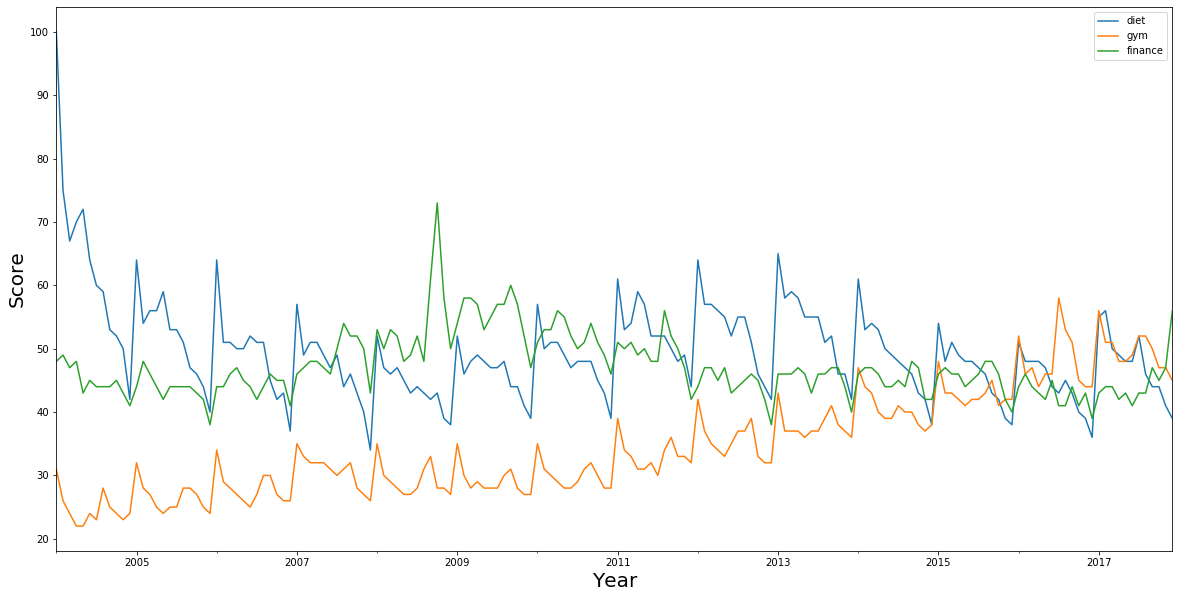

In [52]:
#wstepna ekploracja
# df.plot()
df.plot(figsize=(20,10))
plt.xlabel('Year', fontsize=20)
plt.ylabel('Score', fontsize=20)

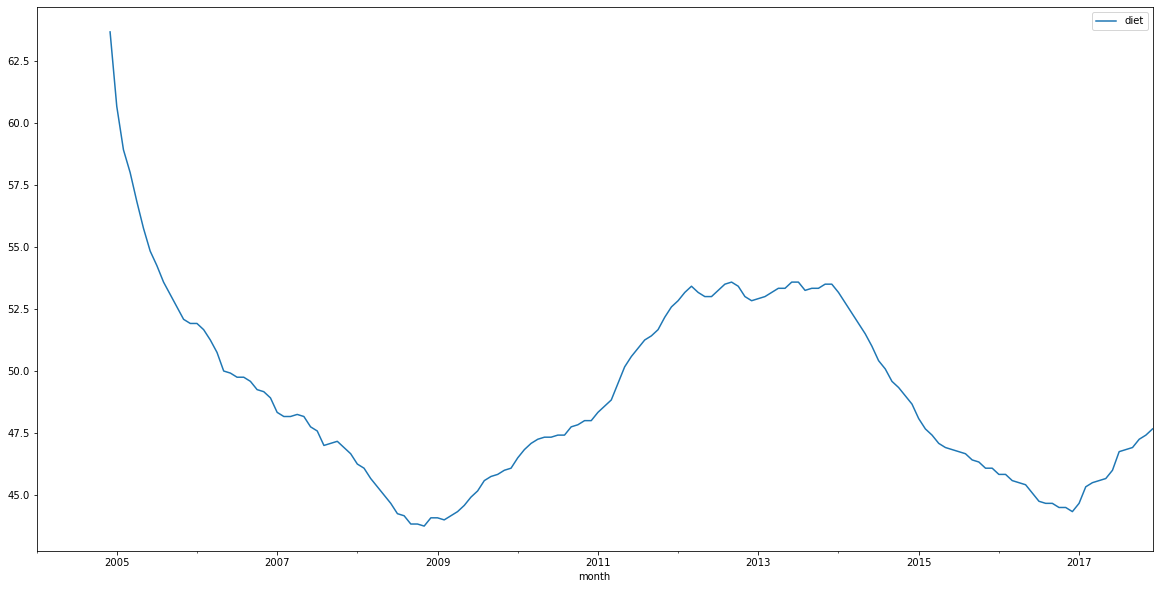

In [73]:
#diet = df[['diet']].plot(figsize=(20,10)) - # wyciaga tylko diet
diet = df[['diet']]
diet.rolling(12).mean().plot(figsize=(20,10))


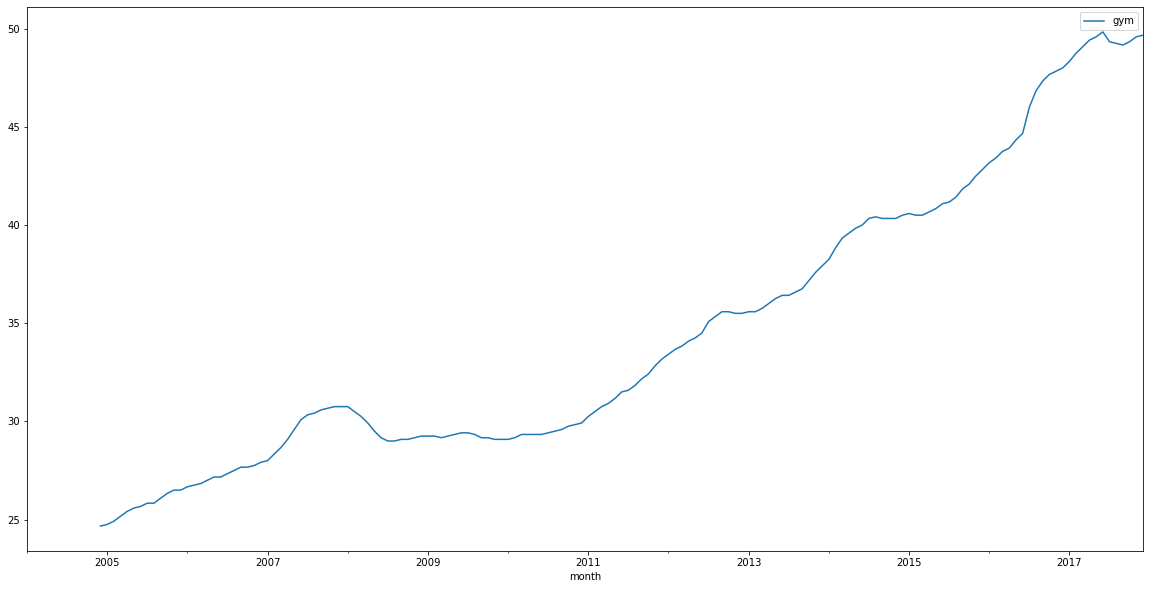

In [57]:
gym = df[['gym']]
gym.rolling(12).mean().plot(figsize=(20,10))


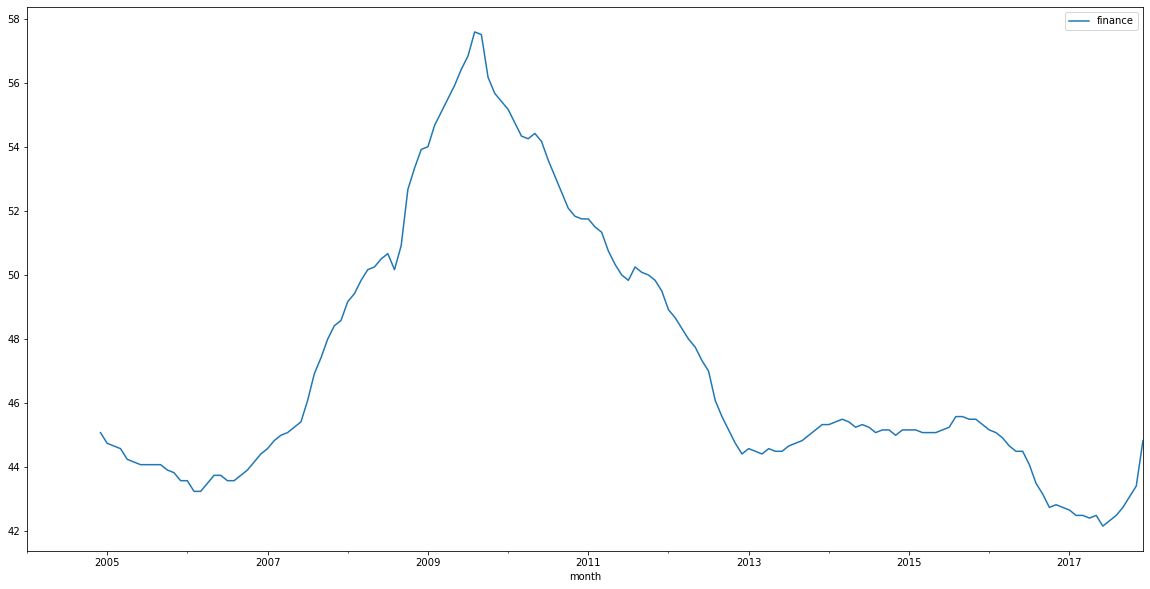

In [58]:
finance= df[['finance']]
finance.rolling(12).mean().plot(figsize=(20,10))


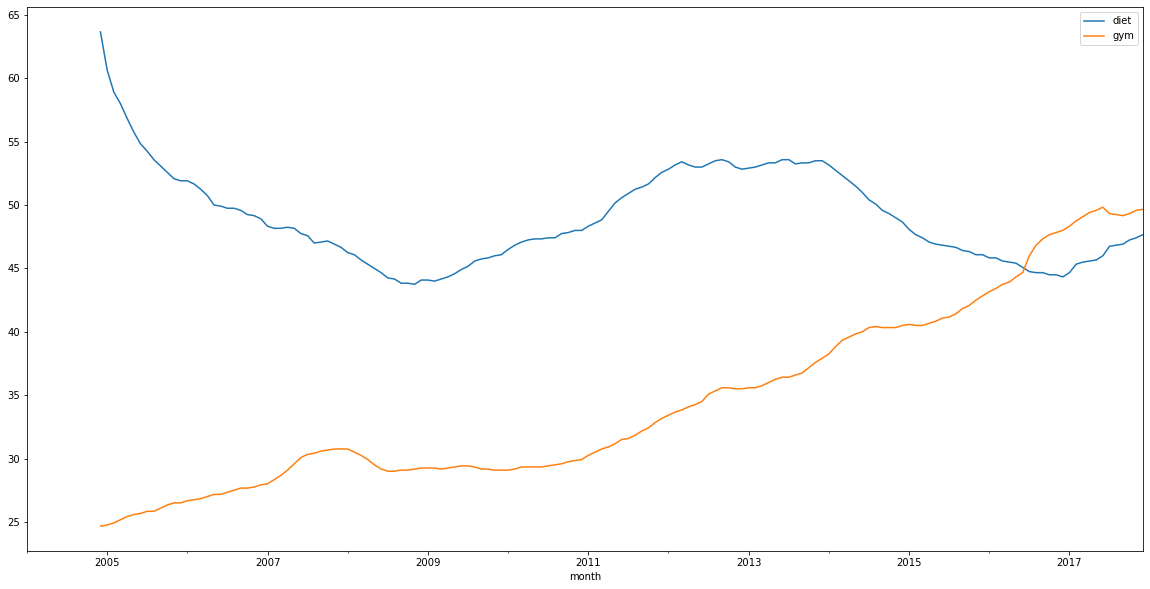

In [63]:
df_diet_gym = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1) # te same warrtosci na 1 osi
df_diet_gym.plot(figsize=(20,10))

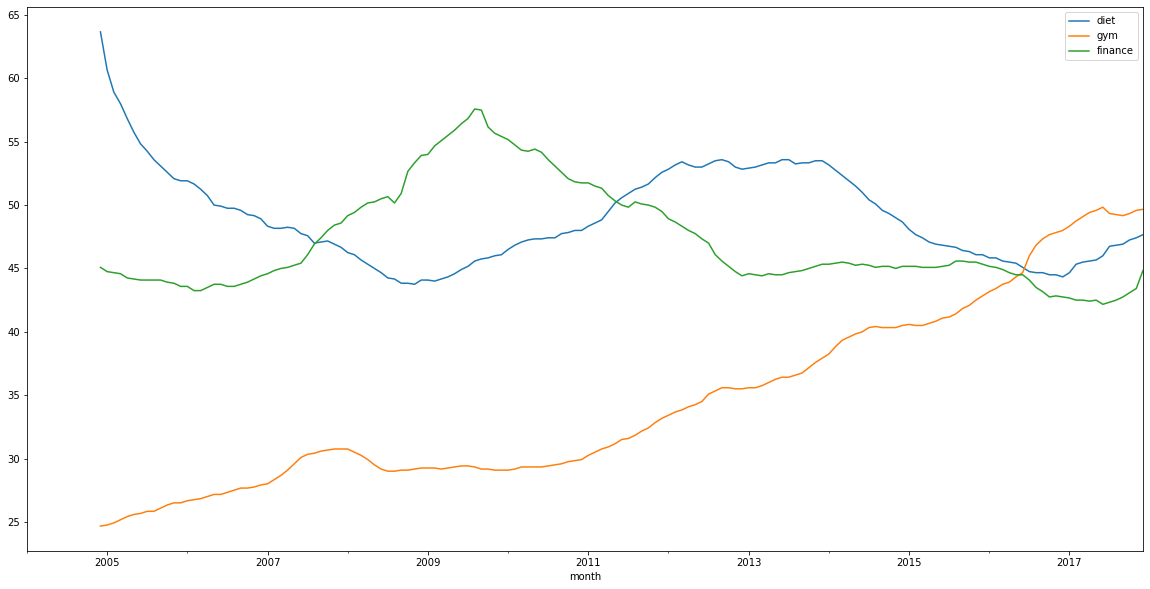

In [72]:
df_diet_gym = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean(), finance.rolling(12).mean()], axis=1) # te same warrtosci na 1 osi
df_diet_gym.plot(figsize=(20,10))

,diet
month,
2005-01-01,22.0
2006-01-01,24.0
2007-01-01,20.0
2008-01-01,18.0
2009-01-01,14.0
2010-01-01,18.0
2011-01-01,22.0
2012-01-01,20.0
2013-01-01,23.0


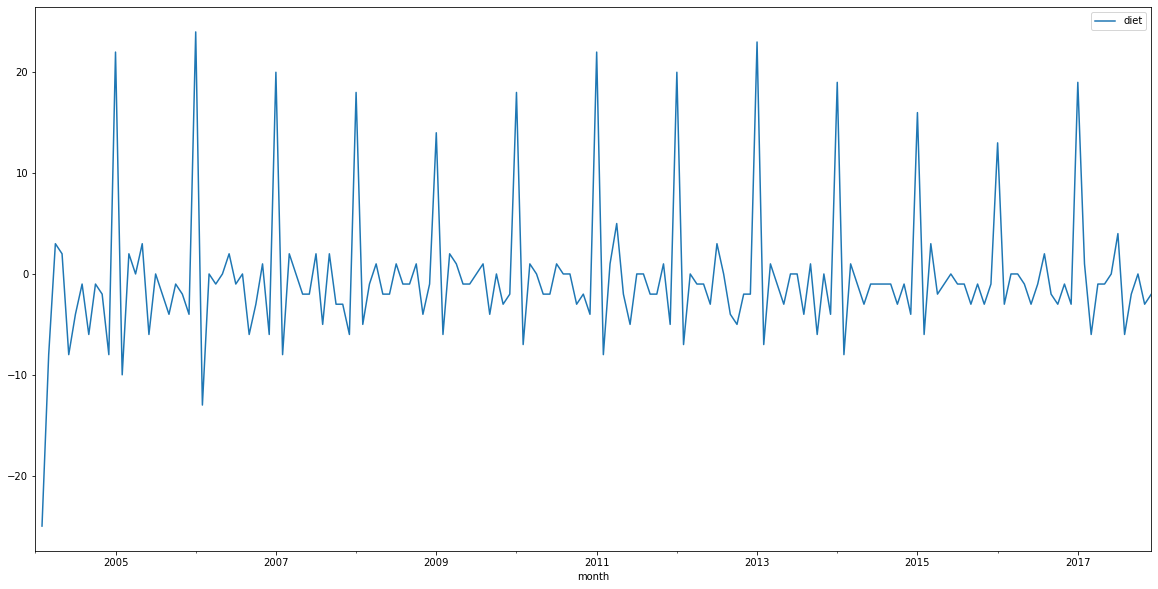

In [74]:
# first - order differencing - sezonowosc

diet.diff().plot(figsize=(20,10));

# kiedy wartosci sa najwieksze
diet_diff = diet.diff()
diet_diff[diet_diff>10].dropna(how='any')

